In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [6]:
data = pd.read_csv('Housing.csv')
data.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
data.shape

(5000, 7)

In [10]:
data.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

<Axes: >

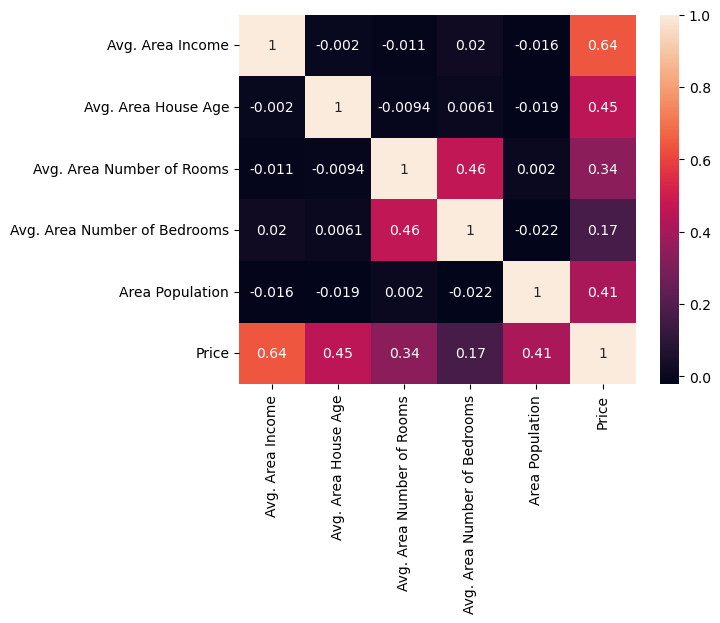

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
data.isnull()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0                False                False                      False   
1                False                False                      False   
2                False                False                      False   
3                False                False                      False   
4                False                False                      False   
...                ...                  ...                        ...   
4995             False                False                      False   
4996             False                False                      False   
4997             False                False                      False   
4998             False                False                      False   
4999             False                False                      False   

      Avg. Area Number of Bedrooms  Area Population  Price  Address  
0                            False            False  False    False  
1                            False            False  False    False  
2                            False            False  False    False  
3                            False            False  False    False  
4                            False            False  False    False  
...                            ...              ...    ...      ...  
4995                         False            False  False    False  
4996                         False            False  False    False  
4997                         False            False  False    False  
4998                         False            False  False    False  
4999                         False            False  False    False  

[5000 rows x 7 columns]

In [13]:
data.isnull().sum()*100/data.shape[0]

Avg. Area Income                0.0
Avg. Area House Age             0.0
Avg. Area Number of Rooms       0.0
Avg. Area Number of Bedrooms    0.0
Area Population                 0.0
Price                           0.0
Address                         0.0
dtype: float64

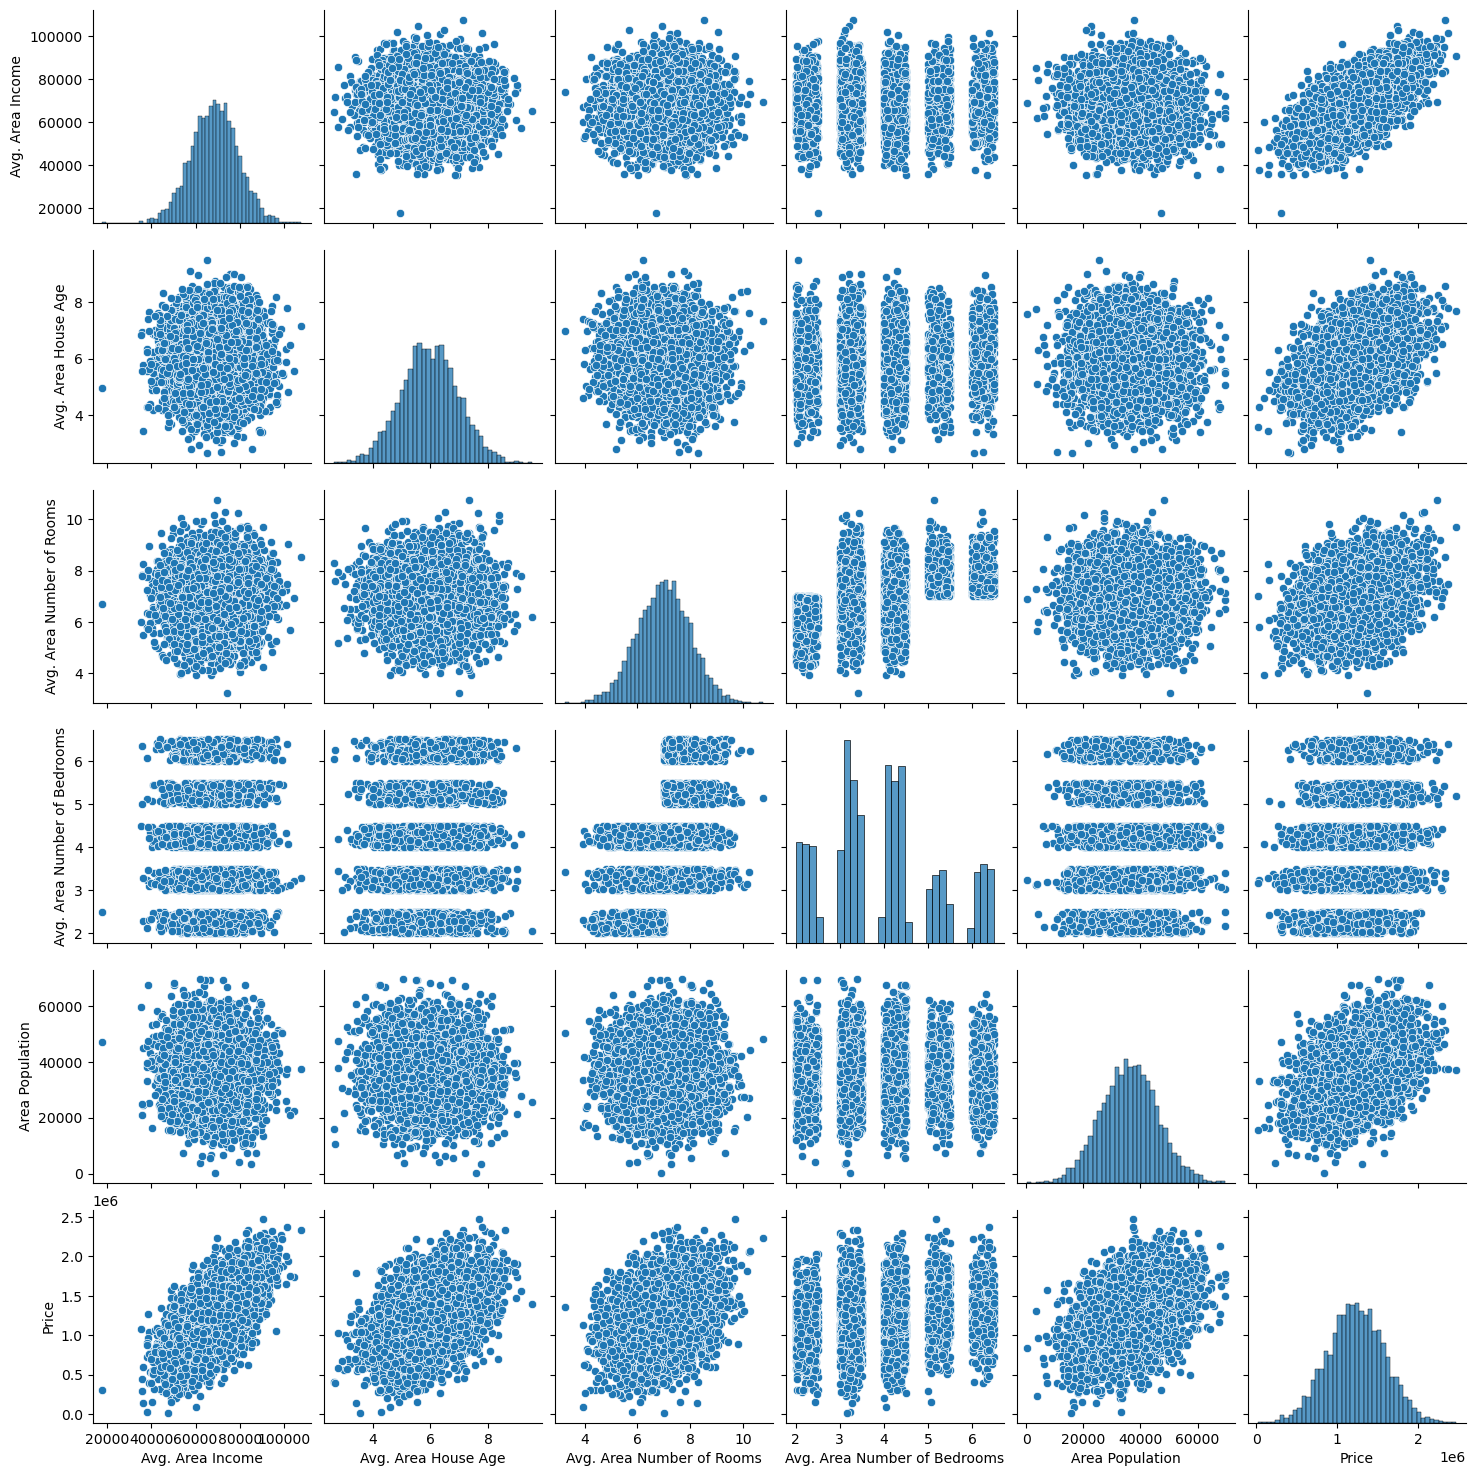

In [14]:
sns.pairplot(data)

In [16]:
#Splitting the data to create model

X = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = data['Price']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101) 

In [18]:
model = LinearRegression() 

model.fit(X_train,y_train)

LinearRegression()

In [19]:
#model evaluation

print(model.intercept_)

-2640159.79685191


In [21]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

In [22]:
#prediction

predictions = model.predict(X_test) 

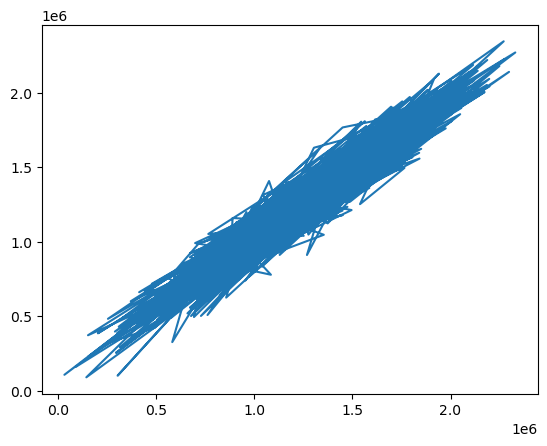

In [23]:
plt.plot(y_test,predictions)
plt.show()

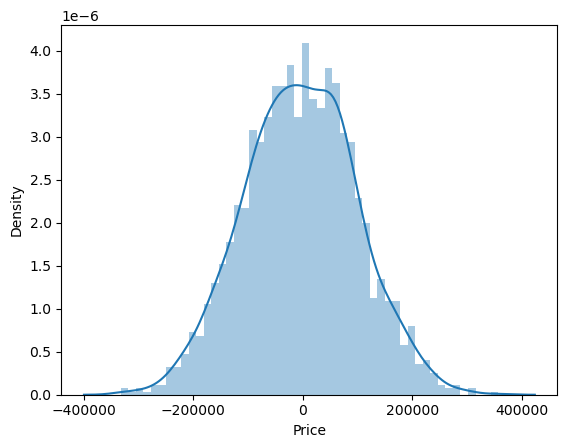

In [24]:
sns.distplot((y_test-predictions),bins=50);

In [25]:
#model evaluation metrics

r2_score(y_test, predictions)

0.91768240096492

Text(0, 0.5, 'y_pred')

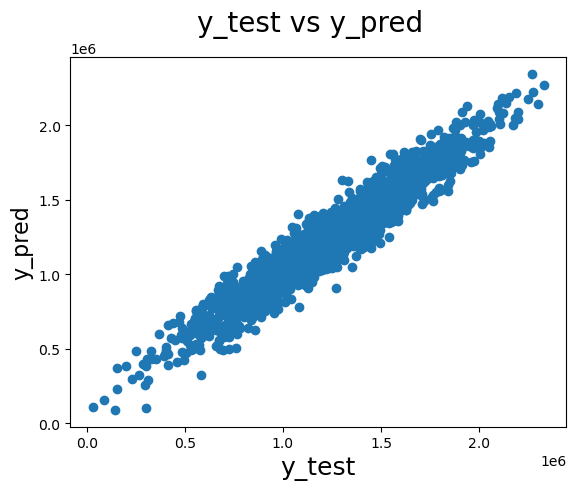

In [26]:
fig = plt.figure()
plt.scatter(y_test,predictions)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)